In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
# Đọc file csv vào dataframe
df = pd.read_csv('15-heart.csv')
print(df.head())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


**Thống kê tần số, 4 thuộc tính quan tâm: Độ tuổi, Giới tính, Nhịp tim và Nguy cơ mắc bệnh**

In [2]:
Age = df['Age']
Sex = df['Sex']
RestingBP = df['RestingBP']
HeartDisease = df['HeartDisease']
selected_columns = df[['Age','Sex','RestingBP', 'HeartDisease']]
selected_columns.head(15)

,Age,Sex,RestingBP,HeartDisease
0,40,M,140,0
1,49,F,160,1
2,37,M,130,0
3,48,F,138,1
4,54,M,150,0
5,39,M,120,0
6,45,F,130,0
7,54,M,110,0
8,37,M,140,1
9,48,F,120,0


In [3]:
# Loại bỏ các giá trị dữ liệu thiếu trong DataFrame
df = df.dropna()

# In số lượng mẫu của DataFrame sau khi loại bỏ các giá trị dữ liệu thiếu
print('Số lượng mẫu của DataFrame sau khi loại bỏ các giá trị dữ liệu thiếu:', len(df))
print(df.isnull().sum())

Số lượng mẫu của DataFrame sau khi loại bỏ các giá trị dữ liệu thiếu: 918
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


**Thực hiện các quản lý dữ liệu (Tinh chỉnh, Tạo biến phụ, Nhóm các đối tượng).**


In [4]:
# Thống kê tần số của biến Độ tuổi
age_freq = df['Age'].value_counts()
# In kết quả
#print("Thống kê tần số độ tuổi của nhóm dữ liệu :")
#print(age_freq)

# Thống kê tần số của biến Nhịp tim
restingBP_freq = df['RestingBP'].value_counts()
#print("Thống kê tần số Nhịp tim của nhóm dữ liệu :")
#print(restingBP_freq)
# Thống kê tần số tỉ lệ Giới tính
sex_freq = df['Sex'].value_counts()
#print("Tỉ lệ giới tính của tập dữ liệu :")
#print(sex_freq)

**THỰC HIỆN NHÓM CÁC ĐỐI TƯỢNG :**

Nhóm tuổi -- Tần số nhịp tim -- Giới tính

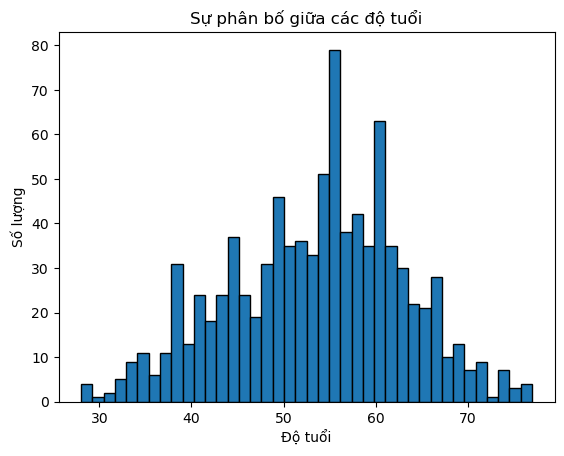

In [5]:
# Vẽ biểu đồ histogram thể hiện sự phân bố giữa các độ tuổi từ thấp đến cao
plt.hist(df['Age'], bins=40, edgecolor='black')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng')
plt.title('Sự phân bố giữa các độ tuổi')
plt.show()

In [6]:
# Tính tỉ lệ phần trăm của cường độ nhịp tim
total_count = len(df)
group_lessthan_60_count = len(df[(df['RestingBP'] >= 0) & (df['RestingBP'] < 60)])
group_60_110_count = len(df[(df['RestingBP'] > 60) & (df['RestingBP'] <= 110)])
group_110_130_count = len(df[(df['RestingBP'] > 110) & (df['RestingBP'] <= 130)])
group_130_140_count = len(df[(df['RestingBP'] > 130) & (df['RestingBP'] <= 140)])
group_140_160_count = len(df[(df['RestingBP'] > 140) & (df['RestingBP'] <= 160)])
group_over_160_count = len(df[df['RestingBP'] > 160])

group_lessthan_60_percent = group_lessthan_60_count / total_count * 100
group_60_110_percent = group_60_110_count / total_count * 100
group_110_130_percent = group_110_130_count / total_count * 100
group_130_140_percent = group_130_140_count / total_count * 100
group_140_160_percent = group_140_160_count / total_count * 100
group_over_160_percent = group_over_160_count / total_count * 100

# In kết quả
print("Tỉ lệ phần trăm của cường độ nhịp tim/m ứng với tập dữ liệu:")
print("Dưới 60: {:.2f}%".format(group_lessthan_60_percent))
print("60-110: {:.2f}%".format(group_60_110_percent))
print("110-130: {:.2f}%".format(group_110_130_percent))
print("130-140: {:.2f}%".format(group_130_140_percent))
print("140-160: {:.2f}%".format(group_140_160_percent))
print("Trên 160: {:.2f}%".format(group_over_160_percent))

Tỉ lệ phần trăm của cường độ nhịp tim/m ứng với tập dữ liệu:
Dưới 60: 0.11%
60-110: 12.09%
110-130: 41.50%
130-140: 22.33%
140-160: 19.28%
Trên 160: 4.68%


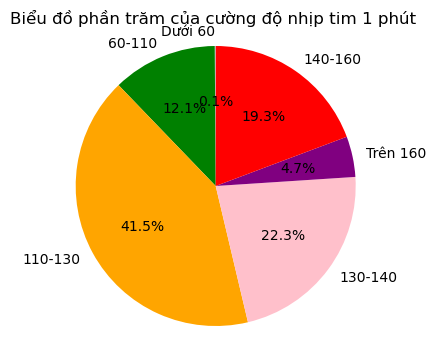

In [7]:
# Vẽ biểu đồ tròn để thể hiện tỉ lệ phần trăm của từng nhóm cường độ nhịp tim
labels = ['Dưới 60','60-110','110-130' , '130-140', 'Trên 160', '140-160']
sizes = [group_lessthan_60_percent, group_60_110_percent, group_110_130_percent, group_130_140_percent, group_over_160_percent, group_140_160_percent]
colors = ['lightblue','green', 'orange', 'pink', 'purple', 'red']
plt.figure(figsize=(5, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle= 90)
plt.title('Biểu đồ phần trăm của cường độ nhịp tim 1 phút ')
plt.axis('equal')
plt.show()

In [8]:
# Tạo các nhóm dựa trên cường độ nhịp tim
df['RestingBP_group'] = pd.cut(df['RestingBP'], bins=[0, 60, 110, 130, 140, 160, float('inf')], labels=['Dưới 60','60-110', '110-130', '130-140', '140-160', 'Trên 160'])

# Tính số lượng mẫu của từng nhóm và số lượng mẫu mắc bệnh của từng nhóm
group_counts = pd.crosstab(df['RestingBP_group'], df['HeartDisease'])
group_counts.columns = ['Không bệnh', 'Có bệnh']
group_counts.index.name = 'Cường độ nhịp tim 1 phút (RestingBP/m)'

# Tính tỉ lệ phần trăm mẫu mắc bệnh của từng nhóm
group_percentages = group_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# In kết quả
print('Tỉ lệ phần trăm mẫu mắc bệnh của từng nhóm (Theo RestingBP):')
print(group_percentages)

Tỉ lệ phần trăm mẫu mắc bệnh của từng nhóm (Theo RestingBP):
                                        Không bệnh    Có bệnh
Cường độ nhịp tim 1 phút (RestingBP/m)                       
60-110                                   48.648649  51.351351
110-130                                  50.656168  49.343832
130-140                                  45.365854  54.634146
140-160                                  32.768362  67.231638
Trên 160                                 27.906977  72.093023


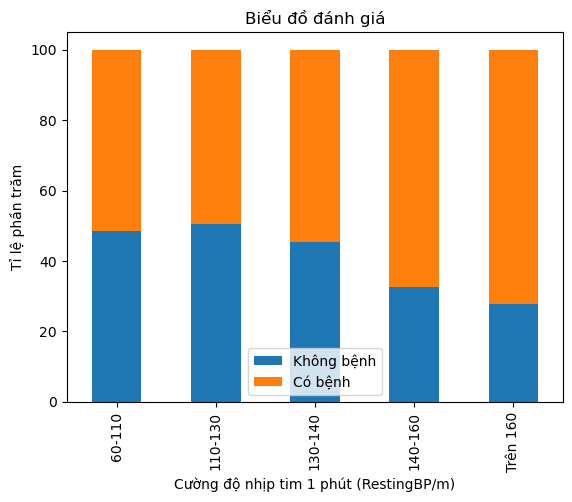

In [9]:
# Tạo các nhóm dựa trên cường độ nhịp tim
df['RestingBP_group'] = pd.cut(df['RestingBP'], bins=[0, 60, 110, 130, 140, 160, float('inf')], labels=['Dưới 60','60-110', '110-130', '130-140', '140-160', 'Trên 160'])

# Tính số lượng mẫu của từng nhóm và số lượng mẫu mắc bệnh của từng nhóm
group_counts = pd.crosstab(df['RestingBP_group'], df['HeartDisease'])
group_counts.columns = ['Không bệnh', 'Có bệnh']
group_counts.index.name = 'Cường độ nhịp tim 1 phút (RestingBP/m)'

# Tính tỉ lệ phần trăm mẫu mắc bệnh của từng nhóm
group_percentages = group_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Vẽ biểu đồ cột để thể hiện tỉ lệ phần trăm mẫu mắc bệnh của từng nhóm
ax = group_percentages.plot(kind='bar', stacked=True)
ax.set_xlabel('Cường độ nhịp tim 1 phút (RestingBP/m)')
ax.set_ylabel('Tỉ lệ phần trăm')
ax.set_title('Biểu đồ đánh giá')
plt.show()

In [10]:
# Chuyển đổi giới tính thành 0 và 1
gender_mapping = {'M': 0, 'F': 1}
df['Sex'] = df['Sex'].map(gender_mapping)

In [11]:
# Tính tỉ lệ phần trăm xuất hiện của hai giới tính
gender_counts = df['Sex'].value_counts()
total_count = len(df)

gender_percentages = gender_counts / total_count * 100

# In kết quả
print("Tỉ lệ phần trăm xuất hiện của các giới tính:")
print("0: Nam; 1: Nữ")
print(gender_percentages)

Tỉ lệ phần trăm xuất hiện của các giới tính:
0: Nam; 1: Nữ
0    78.976035
1    21.023965
Name: Sex, dtype: float64


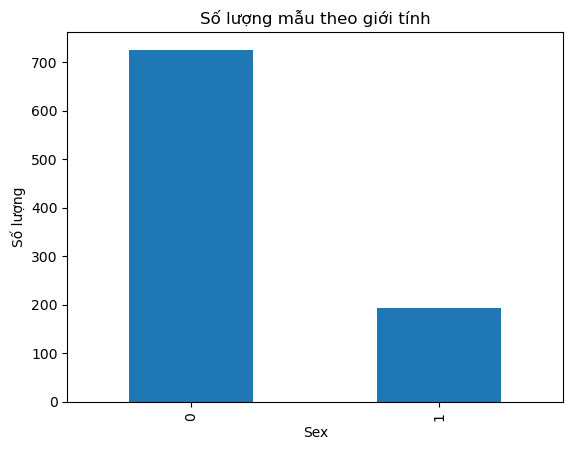

In [12]:
# Tính số lượng mẫu của từng giới tính
gender_counts = df['Sex'].value_counts()

# Vẽ biểu đồ cột để thể hiện số lượng mẫu của từng giới tính
gender_counts.plot(kind='bar')
plt.title('Số lượng mẫu theo giới tính')
plt.xlabel('Sex')
plt.ylabel('Số lượng')
plt.show()

## Tuần 3 

	Thống kê tần số cho biến Cholesterol


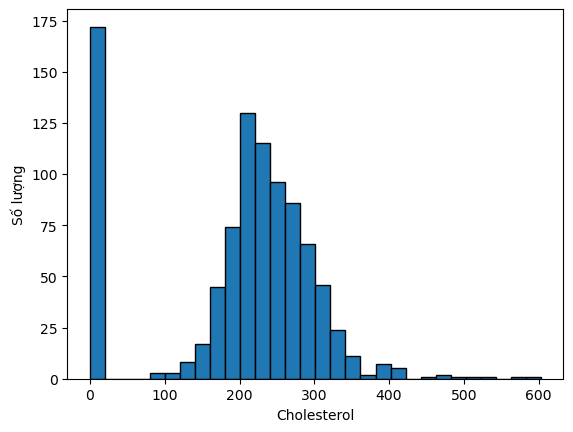

In [13]:
# Vẽ histogram
plt.hist(df['Cholesterol'], bins=30, edgecolor='black')
print('\tThống kê tần số cho biến Cholesterol')
# Đặt tên cho trục x và y
plt.xlabel('Cholesterol')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.show()

	Thống kê tần số cho biến cường độ nhịp tim RestingBP 1 phút


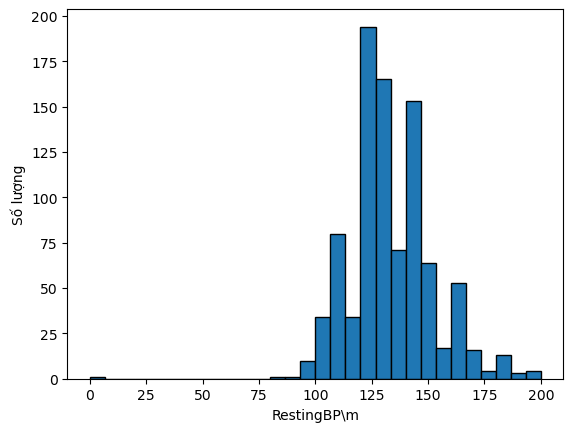

In [14]:
# Vẽ histogram
plt.hist(df['RestingBP'], bins=30, edgecolor='black')
print('\tThống kê tần số cho biến cường độ nhịp tim RestingBP 1 phút')
# Đặt tên cho trục x và y
plt.xlabel('RestingBP\m')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.show()

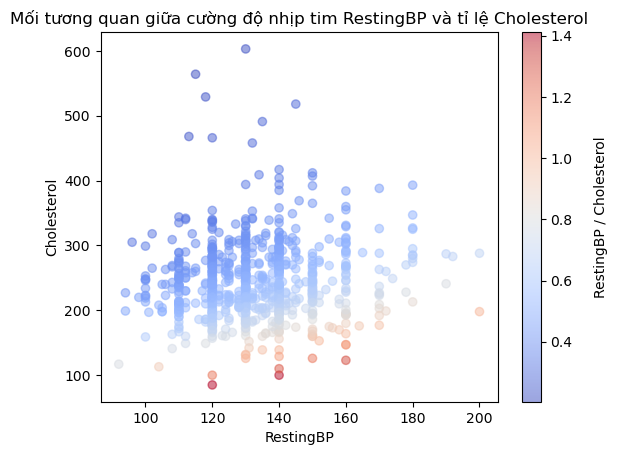

In [15]:
# Tính tỉ lệ giữa RestingBP và Cholesterol
ratio = df['RestingBP'] / df['Cholesterol']

# Vẽ scatter plot
plt.scatter(df['RestingBP'], df['Cholesterol'], c=ratio, cmap='coolwarm', alpha=0.5)

# Đặt tên cho trục x và y
plt.xlabel('RestingBP')
plt.ylabel('Cholesterol')

# Đặt tiêu đề cho biểu đồ
plt.title('Mối tương quan giữa cường độ nhịp tim RestingBP và tỉ lệ Cholesterol')

# Thêm colorbar để hiển thị tỉ lệ giữa RestingBP và Cholesterol
cbar = plt.colorbar()
cbar.set_label('\nRestingBP / Cholesterol')

# Hiển thị biểu đồ
plt.show()

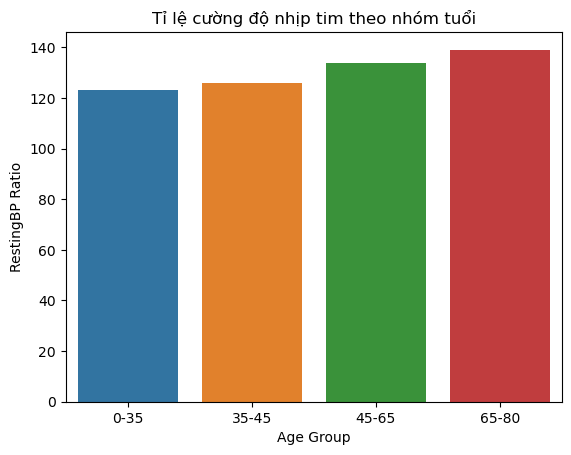

In [16]:
# Tạo các nhóm dựa trên độ tuổi
bins = [0,35,45,65, 80]
labels = ['0-35', '35-45','45-65', '65-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Tính tỉ lệ RestingBP của từng nhóm tuổi
restingbp_ratio_by_age_group = df.groupby('AgeGroup')['RestingBP'].mean()

# Vẽ biểu đồ cột
sns.barplot(x=restingbp_ratio_by_age_group.index, y=restingbp_ratio_by_age_group.values)

# Đặt tiêu đề cho biểu đồ
plt.title('Tỉ lệ cường độ nhịp tim theo nhóm tuổi')

# Đặt tên cho trục x và y
plt.xlabel('Age Group')
plt.ylabel('RestingBP Ratio')

# Hiển thị biểu đồ
plt.show()

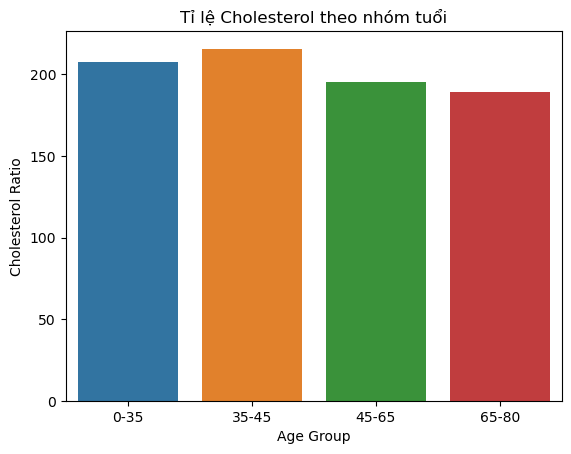

In [17]:
# Tạo các nhóm dựa trên độ tuổi
bins = [0, 35,45,65, 80]
labels = ['0-35', '35-45','45-65', '65-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Tính tỉ lệ RestingBP của từng nhóm tuổi
restingbp_ratio_by_age_group = df.groupby('AgeGroup')['Cholesterol'].mean()

# Vẽ biểu đồ cột
sns.barplot(x=restingbp_ratio_by_age_group.index, y=restingbp_ratio_by_age_group.values)

# Đặt tiêu đề cho biểu đồ
plt.title('Tỉ lệ Cholesterol theo nhóm tuổi')

# Đặt tên cho trục x và y
plt.xlabel('Age Group')
plt.ylabel('Cholesterol Ratio')

# Hiển thị biểu đồ
plt.show()

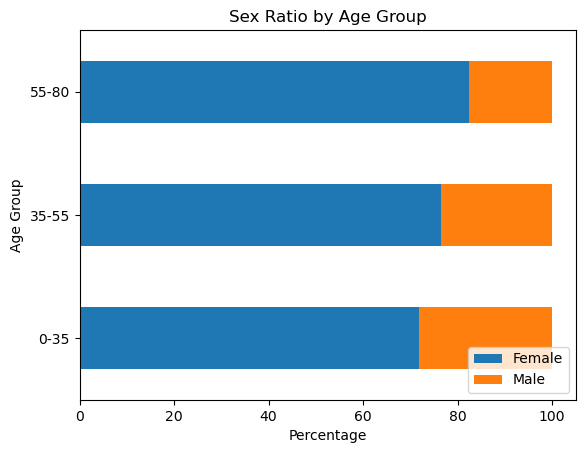

In [18]:
# Tạo các nhóm dựa trên độ tuổi
bins = [0, 35, 55, 80]
labels = ['0-35', '35-55', '55-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Đếm số lượng mẫu của từng nhóm
count_by_age_group = df.groupby('AgeGroup')['Age'].count()

# Đếm số lượng giới tính của từng nhóm
count_by_age_group_and_gender = df.groupby(['AgeGroup', 'Sex'])['Sex'].count()

# Tính tỉ lệ giới tính của từng nhóm
gender_ratio_by_age_group = count_by_age_group_and_gender / count_by_age_group * 100

# Vẽ biểu đồ cột chồng ngang
ax = gender_ratio_by_age_group.unstack().plot(kind='barh', stacked=True)

# Đặt tiêu đề cho biểu đồ
ax.set_title('Sex Ratio by Age Group')

# Đặt tên cho trục x và y
ax.set_xlabel('Percentage')
ax.set_ylabel('Age Group')
ax.legend(['Female','Male'], loc='lower right')
# Hiển thị biểu đồ
plt.show()

# TUẦN 5

In [19]:
# import thư viện
from scipy.stats import f_oneway

# Phân nhóm Cường độ nhịp tim RestingBP 2 loại dưới 140 và từ 140/phút trở lên
group1 = df['Age'][df['RestingBP']< 140]
group2 = df['Age'][df['RestingBP']>= 140]

f_statistic, p_value = f_oneway(group1,group2)
print("Kết quả phân tích ANOVA cho biến 2 loại")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

Kết quả phân tích ANOVA cho biến 2 loại
F-statistic: 49.2262742583175
p-value: 4.432775605623592e-12


In [20]:
import scipy.stats as stats

# Chia biến Cholesterol thành 3 loại
# dưới 200, 200 - 300, trên 300
df['CholesterolGroup'] = pd.cut(df['Cholesterol'],
bins=[0, 200, 300, 600], labels=['<200', '200-300', '>300'])

# Phân tích ANOVA cho biến Age và CholesterolGroup
result = stats.f_oneway(df[df['CholesterolGroup'] == '<200']['Age'], 
                        df[df['CholesterolGroup'] == '200-300']['Age'], 
                        df[df['CholesterolGroup'] == '>300']['Age'])

# In kết quả
print("Kết quả phân tích ANOVA cho biến nhiều hơn 2 loại ")
print('F-statistic:', result.statistic)
print('p-value:', result.pvalue)


Kết quả phân tích ANOVA cho biến nhiều hơn 2 loại 
F-statistic: 3.289995650949604
p-value: 0.037798206455945116


# BUỔI 8

In [21]:
# Import thư viện
from sklearn.linear_model import LinearRegression

# Đọc dữ liệu
data = pd.read_csv('15-heart.csv')

# Lấy 2 biến định lượng Age và RestingBP
X = data[['Age', 'RestingBP']]
y = data['HeartDisease']

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# In ra các hệ số hồi quy
print('Hệ số và phương trình hồi quy:\n')
print('Hệ số chặn:', model.intercept_)
print('Hệ số hồi quy tuổi:', model.coef_[0])
print('Hệ số hồi quy Cường độ nhịp tim:', model.coef_[1])

print('y = {:.5f} + {:.5f}*Age + {:.5f}*RestingBP'
      .format(model.intercept_, model.coef_[0], model.coef_[1]))

Hệ số và phương trình hồi quy:

Hệ số chặn: -0.3512756293083513
Hệ số hồi quy tuổi: 0.014358787685796511
Hệ số hồi quy Cường độ nhịp tim: 0.0010294907044239305
y = -0.35128 + 0.01436*Age + 0.00103*RestingBP


Mô hình hồi quy tuyến tính được tạo để dự đoán giá trị phụ thuộc (y) dựa trên các biến độc lập (Age và RestingBP). Hệ số hồi quy của biến RestingBP là 0.0010294907044239305, cho thấy mối quan hệ dương tính giữa RestingBP và giá trị phụ thuộc. Phương trình hồi quy cho biến Age và RestingBP là y = -0.35128 + 0.01436*Age + 0.00103*RestingBP. Cụ thể, mỗi đơn vị tăng của Age và RestingBP sẽ dẫn đến tăng giá trị phụ thuộc y tương ứng với hệ số của từng biến.

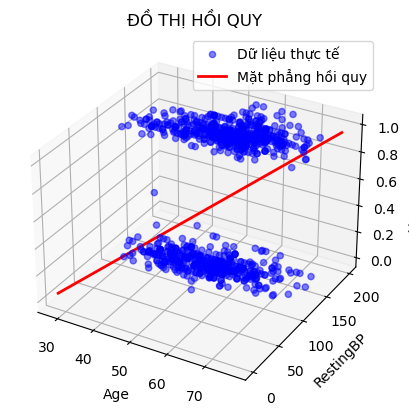

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Tạo figure và axes cho đồ thị 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tạo các giá trị Age và RestingBP để dự đoán
Age_values = np.linspace(min(data['Age']), max(data['Age']),100)
RestingBP_values = np.linspace(min(data['RestingBP']), max(data['RestingBP']),100)
# Dự đoán giá trị HeartDisease từ mô hình hồi quy
predicted_values = model.coef_[0]*Age_values + model.coef_[1]*RestingBP_values + model.intercept_
# Vẽ scatter plot cho dữ liệu thực tế
ax.scatter(data['Age'], data['RestingBP'],data['HeartDisease'], 
           c='blue',label = 'Dữ liệu thực tế',alpha = 0.5)
# Vẽ đường hồi quy
ax.plot(Age_values, RestingBP_values, predicted_values, c= 'red', linewidth = 2, 
        label='Mặt phẳng hồi quy')
# Đặt tên cho trục x, y, z
ax.set_xlabel('Age')
ax.set_ylabel('RestingBP')
ax.set_zlabel('HeartDisease')

# Hiển thị legend và hiển thị đồ thị
plt.title('ĐỒ THỊ HỒI QUY')
plt.legend()
plt.show()

In [23]:
# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Chọn biến độc lập và biến phụ thuộc
X = data[['HeartDisease']]
y = data['Cholesterol']

# Huấn luyện mô hình
model.fit(X, y)

# Lấy các hệ số của phương trình hồi quy tuyến tính
beta_0 = model.intercept_
beta_1 = model.coef_[0]

# Hiển thị phương trình hồi quy tuyến tính
print(f'Phương trình hồi quy tuyến tính:\n Cholesterol = {beta_0}+ {beta_1} * HeartDisease')

Phương trình hồi quy tuyến tính:
 Cholesterol = 227.12195121951225+ -51.18100633762255 * HeartDisease


- Giá trị 227.12195121951225 là hệ số chặn (intercept) của phương trình hồi quy, đại diện cho giá trị trung bình của Cholesterol  khi HeartDisease bằng 0.
- Giá trị -51.18100633762255 là hệ số của biến HeartDisease trong phương trình hồi quy, đại diện cho sự thay đổi trung bình của FastingBS khi HeartDisease tăng lên 1 đơn vị.
 Có bệnh: Cholesterol  = 227.1219 + (-51.181) * 1 =  169.9409
 Không bệnh: Cholesterol  = 227.1219 + (-51.181) *0 = 227.1219
Ý nghĩa của phương trình hồi quy tuyến tính là giúp chúng ta hiểu mối quan hệ giữa biến độc lập (HeartDisease) và biến phụ thuộc (FastingBS). Ý nghĩa của phương trình hồi quy tuyến tính là khi giá trị của biến độc lập "HeartDisease" tăng lên 1 đơn vị, giá trị của biến phụ thuộc "Cholesterol" sẽ giảm đi khoảng 51.18100633762255 đơn vị.

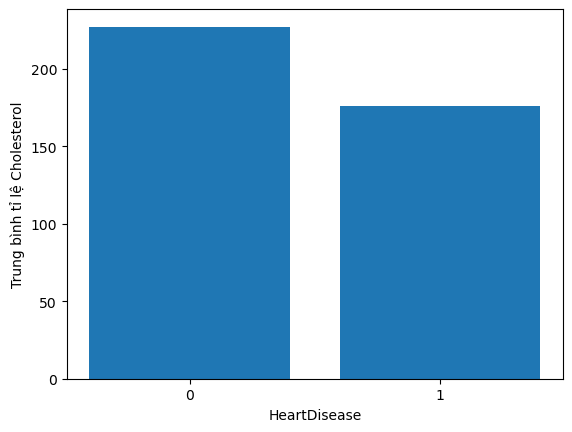

In [24]:
import matplotlib.pyplot as plt

# Tính trung bình Cholesterol cho từng giá trị HeartDisease
mean_cholesterol = data.groupby('HeartDisease')['Cholesterol'].mean()

# Vẽ biểu đồ histogram
plt.bar(mean_cholesterol.index, mean_cholesterol)
plt.xlabel('HeartDisease')
plt.ylabel('Trung bình tỉ lệ Cholesterol')
plt.xticks(mean_cholesterol.index)
plt.show()


Như vậy những người mắc bệnh suy tim trong tập dữ liệu thường có tỉ lệ Cholesterol 169mm/dl và những người không mắc bệnh có chỉ số Cholesterol cao hơn

# BUỔI 11

Xác định biến phản hồi là HeartDisease (0: Không có bệnh, 1: Có bệnh)

Cài đặt thư viện graphviz và load tập dữ liệu "heart"

In [25]:
!pip install graphviz
import numpy as np
import pandas as pd
import graphviz
data = pd.read_csv('15-heart.csv')
print(data.head())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [3]:
# Chuyển đổi giá trị "yes" thành 1 và "no" thành 0
data.replace({'Sex': {'M': 1, 'F': 0},
              'ExerciseAngina': {'Y': 1, 'N': 0}}, inplace=True)

NameError: name 'data' is not defined

In [27]:
# Một số dữ liệu ảnh hưởng đến mô hình máy học 
features = ["Age", "Sex", "RestingBP", "Cholesterol", "FastingBS", 
            "MaxHR", "ExerciseAngina", "Oldpeak"]

In [28]:
dataX = data[features]
dataX.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak
0,40,1,140,289,0,172,0,0.0
1,49,0,160,180,0,156,0,1.0
2,37,1,130,283,0,98,0,0.0
3,48,0,138,214,0,108,1,1.5
4,54,1,150,195,0,122,0,0.0


In [1]:
features_response = list(dataX.columns)

NameError: name 'dataX' is not defined

In [2]:
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree

# Lấy ra các cột trong dataFrame tương ứng trong danh sách features_response
X = data[features_response[:-1]].values
y = data['HeartDisease'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'data' is not defined

In [55]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# Dự đoán kết quả trên tập kiểm tra
y_test_predict = log_reg.predict(X_test)
print("Độ chính xác mô hình logistic trên tập Test:", sum(y_test == y_test_predict) / len(y_test))


Độ chính xác mô hình logistic trên tập Test: 0.7771739130434783


In [62]:
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

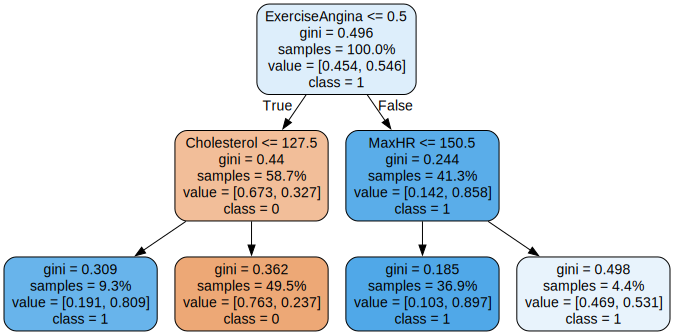

In [64]:
from IPython.display import Image

class_names = [str(class_name) for class_name in np.unique(y_train)]

dot_data = tree.export_graphviz(dt, out_file=None, filled=True, rounded=True, 
                                feature_names=features_response[:-1], proportion=True, class_names=class_names)
graph = graphviz.Source(dot_data, format='png', engine='dot')
graph


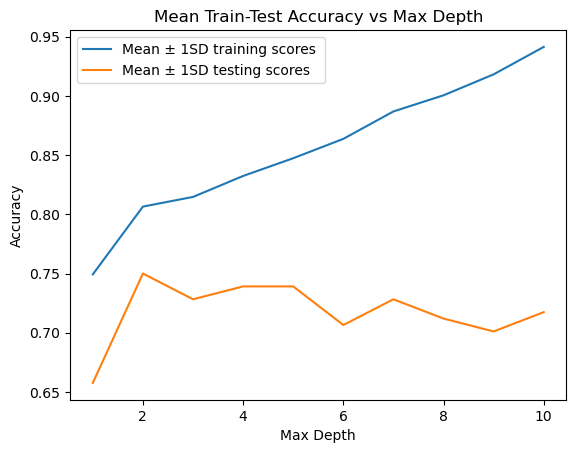

Max_depth tốt nhất: 2


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Tạo ra các giá trị max_depth để kiểm tra
max_depths = range(1, 11)

# Khởi tạo các list để lưu trữ mean train-test
mean_train_scores = []
mean_test_scores = []

# Vòng lặp qua các giá trị max_depth và tính toán mean train-test
for max_depth in max_depths:
    # Tạo ra một đối tượng mô hình cây quyết định
    dt = DecisionTreeClassifier(max_depth=max_depth)
    
    # Huấn luyện mô hình trên tập huấn luyện
    dt.fit(X_train, y_train)
    
    # Dự đoán nhãn trên tập huấn luyện và tập kiểm tra
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    
    # Tính toán độ chính xác trên tập huấn luyện và tập kiểm tra
    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)
    
    # Lưu trữ mean train-test vào các list tương ứng
    mean_train_scores.append(train_score)
    mean_test_scores.append(test_score)

# Vẽ đồ thị mean train-test theo max_depths
plt.plot(max_depths, mean_train_scores, label='Mean ± 1SD training scores ')
plt.plot(max_depths, mean_test_scores, label='Mean ± 1SD testing scores')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Mean Train-Test Accuracy vs Max Depth')
plt.legend()
plt.show()

# In ra giá trị max_depth tốt nhất
best_max_depth = max_depths[np.argmax(mean_test_scores)]
print("Max_depth tốt nhất:", best_max_depth)


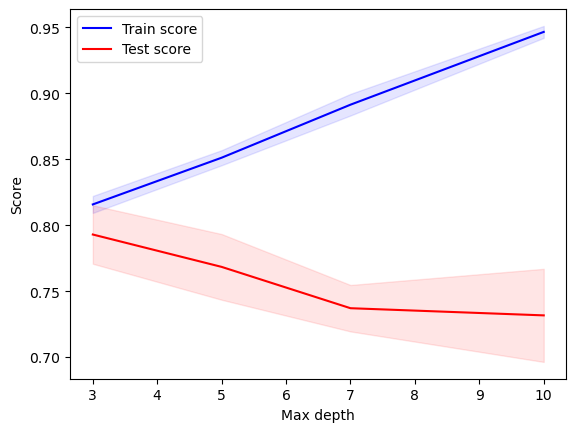

In [76]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Tạo ra một đối tượng mô hình cây quyết định
dt = DecisionTreeClassifier()

# Xác định các giá trị max_depth để kiểm tra
param_grid = {'max_depth': [3, 5, 7, 10]}

# Sử dụng GridSearchCV để tìm max_depth tốt nhất
grid_search = GridSearchCV(dt, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

# Lấy ra các kết quả cross-validation
cv_results = grid_search.cv_results_

# Lấy ra các giá trị max_depth và train/test scores
max_depths = cv_results['param_max_depth'].data.astype(int)
mean_train_scores = cv_results['mean_train_score']
std_train_scores = cv_results['std_train_score']
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']

# Vẽ đồ thị mean +- 1SD train/test scores tương ứng với các giá trị max_depth
plt.plot(max_depths, mean_train_scores, label='Train score', color='blue')
plt.fill_between(max_depths, mean_train_scores - std_train_scores, mean_train_scores + std_train_scores, alpha=0.1, color='blue')
plt.plot(max_depths, mean_test_scores, label='Test score', color='red')
plt.fill_between(max_depths, mean_test_scores - std_test_scores, mean_test_scores + std_test_scores, alpha=0.1, color='red')
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.legend()
plt.show()
